In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [143]:
#Lets create synthetic dataset
from sklearn.datasets import make_classification

X,y=make_classification(n_samples=1000,n_features=2,n_informative=2,n_classes=2,class_sep=2,n_redundant=0,n_clusters_per_class=2,random_state=42)

In [144]:
X

array([[ 8.98217510e-04,  3.36140003e-01],
       [ 2.24668618e+00,  2.15359685e+00],
       [ 1.96277683e+00,  1.85939747e+00],
       ...,
       [ 8.98732537e-01, -2.59017563e+00],
       [ 1.64376105e+00, -1.78053855e+00],
       [ 1.69852984e+00, -2.27940455e+00]])

<Axes: xlabel='0', ylabel='1'>

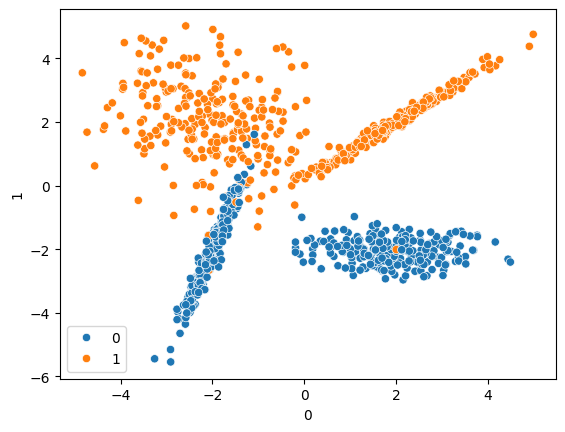

In [145]:
#scatterplot
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [146]:
from sklearn.svm import SVC
svc=SVC(kernel='linear') #default kernel='linear'

In [147]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [148]:
#Model training
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [149]:
#Preedcition
y_pred=svc.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0])

In [150]:
#metrics
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test)) #almost 100% accuracy

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       125
           1       0.96      0.98      0.97       125

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[120   5]
 [  2 123]]


In [151]:
#rbf
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [152]:
#prediction(rbf)

y_pred1=rbf.predict(X_test)

print(confusion_matrix(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

[[120   5]
 [  2 123]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       125
           1       0.96      0.98      0.97       125

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [153]:
poly=SVC(kernel='poly')
poly.fit(X_train,y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [154]:
#predictiopn (polynomial)

y_pred1=poly.predict(X_test)

print(confusion_matrix(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

[[119   3]
 [  3 125]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       122
           1       0.98      0.98      0.98       128

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [158]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

#define parameters range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf','linear', 'poly', 'sigmoid']}

In [161]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,refit=True)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.973 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.993 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.960 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.960 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.967 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [163]:
best_params = grid.best_params_
print(f"BEST PARAMETERS FOR THE DATASET ARE {best_params}")

BEST PARAMETERS FOR THE DATASET ARE {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
